# Model Comparison

---

## VGG16

The botleneck features for the VGG16 deep learning are imported in the cell below for the training, validation and test datasets.

In [1]:
import numpy as np

bottleneck_features = np.load('kaggle_vgg16.npz')
train_vgg16 = bottleneck_features['train_features']
valid_vgg16 = bottleneck_features['valid_features']
test_vgg16 = bottleneck_features['test_features']

train_targets = bottleneck_features['train_targets']
valid_targets = bottleneck_features['valid_targets']
test_targets = bottleneck_features['test_targets']

A simple Convolutional Neural Network is created below. It is made of a global average pooling layer and a fully connected layer, where the latter contains one node for each label, i.e. 9, and is equipped with a `sigmoid` activation function. Note that this CNN takes the VGG16 bottleneck features as input.

In [3]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense

vgg16 = Sequential()
vgg16.add(GlobalAveragePooling2D(input_shape = train_vgg16.shape[1:]) )
vgg16.add(Dense(9, activation = 'sigmoid') )

vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 4617      
Total params: 4,617
Trainable params: 4,617
Non-trainable params: 0
_________________________________________________________________


The CNN is then compiled and trained in the cells below.

In [4]:
from keras.optimizers import SGD

sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
vgg16.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [5]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpointer = ModelCheckpoint(filepath='weights.best.VGG16.hdf5', verbose=1, save_best_only=True)
checkimprovement = EarlyStopping(monitor='val_loss', min_delta=0, patience=20)

history_vgg16 = vgg16.fit(train_vgg16, train_targets, validation_data=(valid_vgg16,valid_targets), 
                          epochs=200, batch_size=64, callbacks=[checkpointer,checkimprovement], 
                          verbose=0)


Epoch 00001: val_loss improved from inf to 1.71263, saving model to weights.best.VGG16.hdf5

Epoch 00002: val_loss improved from 1.71263 to 1.51063, saving model to weights.best.VGG16.hdf5

Epoch 00003: val_loss improved from 1.51063 to 1.38591, saving model to weights.best.VGG16.hdf5

Epoch 00004: val_loss improved from 1.38591 to 1.29335, saving model to weights.best.VGG16.hdf5

Epoch 00005: val_loss improved from 1.29335 to 1.22326, saving model to weights.best.VGG16.hdf5

Epoch 00006: val_loss improved from 1.22326 to 1.16486, saving model to weights.best.VGG16.hdf5

Epoch 00007: val_loss improved from 1.16486 to 1.11504, saving model to weights.best.VGG16.hdf5

Epoch 00008: val_loss improved from 1.11504 to 1.07357, saving model to weights.best.VGG16.hdf5

Epoch 00009: val_loss improved from 1.07357 to 1.03911, saving model to weights.best.VGG16.hdf5

Epoch 00010: val_loss improved from 1.03911 to 1.00630, saving model to weights.best.VGG16.hdf5

Epoch 00011: val_loss improved fr

In [6]:
import matplotlib.pyplot as plt

def performance(model):
    plt.figure(figsize = (15, 5) )
    
    plt.subplot(121)
    plt.plot(model.history['loss'], color = 'blue', label = 'train')
    plt.plot(model.history['val_loss'], color = 'red', label = 'valid')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss Function')
    
    plt.subplot(122)
    plt.plot(model.history['acc'], color = 'blue', label = 'train')
    plt.plot(model.history['val_acc'], color = 'red', label = 'valid')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

The loss and accuracy across epochs for the training and validation data are plotted.

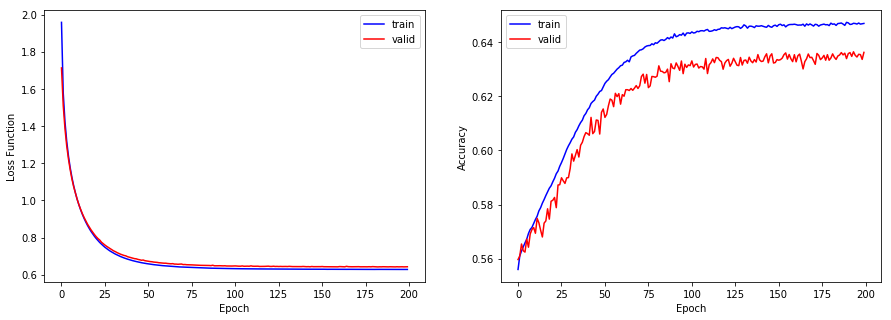

In [7]:
performance(history_vgg16)

The predictions on the test dataset are calculated and the $F_1$ score is derived.

In [8]:
vgg16_predictions = vgg16.predict(test_vgg16)

In [9]:
def true_pos(y_true, y_pred):
    return np.sum(y_true * np.round(y_pred))

def false_pos(y_true, y_pred):
    return np.sum(y_true * (1. - np.round(y_pred)))

def false_neg(y_true, y_pred):
    return np.sum((1. - y_true) * np.round(y_pred))

def precision(y_true, y_pred):
    return true_pos(y_true, y_pred) / (true_pos(y_true, y_pred) + false_pos(y_true, y_pred))

def recall(y_true, y_pred):
    return true_pos(y_true, y_pred) / (true_pos(y_true, y_pred) + false_neg(y_true, y_pred))

def f1_score(y_true, y_pred):
    return 2. / (1. / recall(y_true, y_pred) + 1. / precision(y_true, y_pred))

In [10]:
vgg16_score = f1_score(test_targets, vgg16_predictions)
print('F1 score: %.2f' % vgg16_score)

F1 score: 0.65
